In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

In [280]:
df = pd.read_csv('dataset (missing + split)/processed.csv', skipinitialspace=True)

In [281]:
df.drop(columns=['name', 'album_name', 'artists'], inplace=True)

In [282]:
cat = ['explicit','key','mode','time_signature','genre']
num = [col for col in df.columns if col not in cat]

## Preprocessing

In [283]:
# categorical vars

for col in cat:
    dict = {}
    for elem in df[col].unique():
        dict[elem] = f'{col}={elem}'
        
    df[col] = df[col].map(dict)
df[cat].iloc[:6]

,explicit,key,mode,time_signature,genre
0,explicit=False,key=5,mode=1.0,time_signature=4.0,genre=j-dance
1,explicit=False,key=1,mode=0.0,time_signature=4.0,genre=iranian
2,explicit=False,key=2,mode=1.0,time_signature=4.0,genre=black-metal
3,explicit=False,key=5,mode=1.0,time_signature=4.0,genre=bluegrass
4,explicit=False,key=7,mode=1.0,time_signature=4.0,genre=happy
5,explicit=True,key=5,mode=1.0,time_signature=4.0,genre=industrial


In [284]:
newnum = []
for col in num:
    newcol = f'{col}Bin'
    df[newcol] = pd.qcut(df[col], 4, duplicates='drop', precision=1)
    df.drop(columns=[col], inplace=True)
    df[newcol] = col + '=' + df[newcol].astype(str)

    newnum.append(newcol)
df[newnum].iloc[:6]

,duration_msBin,popularityBin,danceabilityBin,energyBin,speechinessBin,instrumentalnessBin,livenessBin,valenceBin,tempoBin
0,"duration_ms=(227826.0, 288557.5]","popularity=(42.0, 94.0]","danceability=(0.6, 0.7]","energy=(0.5, 0.7]","speechiness=(0.09, 0.6]","instrumentalness=(0.003, 0.7]","liveness=(0.28, 0.99]","valence=(0.4, 0.7]","tempo=(142.0, 220.5]"
1,"duration_ms=(288557.5, 1240944.0]","popularity=(-0.1, 14.0]","danceability=(-0.1, 0.4]","energy=(-0.1, 0.5]","speechiness=(0.05, 0.09]","instrumentalness=(0.7, 1.0]","liveness=(0.28, 0.99]","valence=(-0.1, 0.2]","tempo=(-0.1, 100.0]"
2,"duration_ms=(288557.5, 1240944.0]","popularity=(-0.1, 14.0]","danceability=(-0.1, 0.4]","energy=(0.7, 0.9]","speechiness=(0.04, 0.05]","instrumentalness=(0.7, 1.0]","liveness=(0.13, 0.28]","valence=(0.4, 0.7]","tempo=(100.0, 124.2]"
3,"duration_ms=(227826.0, 288557.5]","popularity=(14.0, 24.0]","danceability=(0.4, 0.6]","energy=(0.5, 0.7]","speechiness=(0.05, 0.09]","instrumentalness=(-0.1, 0.003]","liveness=(0.098, 0.13]","valence=(0.2, 0.4]","tempo=(124.2, 142.0]"
4,"duration_ms=(288557.5, 1240944.0]","popularity=(24.0, 42.0]","danceability=(0.6, 0.7]","energy=(0.5, 0.7]","speechiness=(0.05, 0.09]","instrumentalness=(0.003, 0.7]","liveness=(0.28, 0.99]","valence=(0.4, 0.7]","tempo=(142.0, 220.5]"
5,"duration_ms=(180111.8, 227826.0]","popularity=(24.0, 42.0]","danceability=(0.6, 0.7]","energy=(0.9, 1.0]","speechiness=(0.09, 0.6]","instrumentalness=(-0.1, 0.003]","liveness=(0.28, 0.99]","valence=(0.4, 0.7]","tempo=(100.0, 124.2]"


## Pattern Mining

In [285]:
from fim import fpgrowth

In [286]:
X = df.values.tolist()

In [287]:
supp = 1 # 1%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="m", supp=supp, zmin=zmin, report="S")
item_df = pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

In [288]:
item_df.sort_values(by='support', ascending=False).to_csv(path_or_buf='/Users/ilariaritelli/Desktop/itemsets.csv', sep=',')

In [289]:
conf = 75
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False).to_csv(path_or_buf='/Users/ilariaritelli/Desktop/rules.csv', sep=',')

In [303]:
col = 'genre='
rules_df[rules_df['consequent'].str.contains(col)].sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
61884,genre=sleep,"(popularity=(42.0, 94.0], instrumentalness=(0....",140,0.936455,0.921053,18.458092
61887,genre=sleep,"(popularity=(42.0, 94.0], instrumentalness=(0....",140,0.936455,0.921053,18.458092
61844,genre=sleep,"(popularity=(42.0, 94.0], instrumentalness=(0....",148,0.989967,0.919255,18.422061
61848,genre=sleep,"(popularity=(42.0, 94.0], instrumentalness=(0....",148,0.989967,0.919255,18.422061
59368,genre=study,"(danceability=(0.7, 1.0], instrumentalness=(0....",151,1.010033,0.915152,18.290796
...,...,...,...,...,...,...
61287,genre=sleep,"(instrumentalness=(0.7, 1.0], valence=(-0.1, 0...",194,1.297659,0.751938,15.068998
61901,genre=sleep,"(popularity=(42.0, 94.0], speechiness=(0.04, 0...",114,0.762542,0.750000,15.030161
61482,genre=sleep,"(liveness=(0.28, 0.99], valence=(-0.1, 0.2], d...",156,1.043478,0.750000,15.030161
59433,genre=study,"(danceability=(0.6, 0.7], instrumentalness=(0....",130,0.869565,0.751445,15.018856


In [114]:
rules_df.iloc[47811]['antecedent']

('key=0', 'popularity=(42.0, 94.0]', 'speechiness=(-0.1, 0.04]')

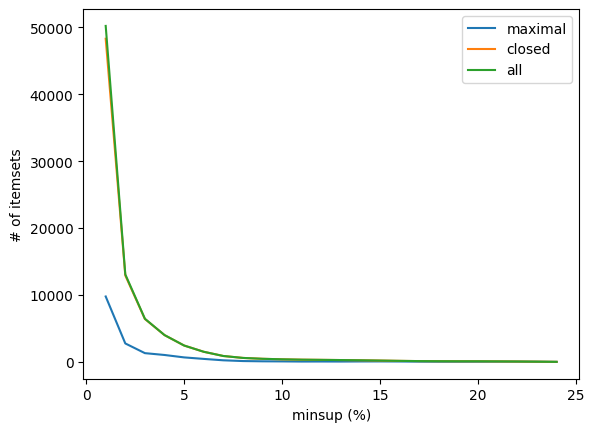

In [16]:
len_max_it = []
len_cl_it = []
len_reg_it = []
max_supp = 25
for i in range(1, max_supp):
    max_itemsets = fpgrowth(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = fpgrowth(X, target="c", supp=i, zmin=zmin)
    reg_itemsets = fpgrowth(X, target="s", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))
    len_reg_it.append(len(reg_itemsets))
plt.plot(np.arange(1, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(1, max_supp), len_cl_it, label="closed")
plt.plot(np.arange(1, max_supp), len_reg_it, label="all")
plt.legend()
plt.xlabel("minsup (%)")
plt.ylabel("# of itemsets")

#plt.yscale('log')
plt.savefig(fname='./img/pm_itemsets_minsup.png', dpi=300, bbox_inches='tight')

plt.show()

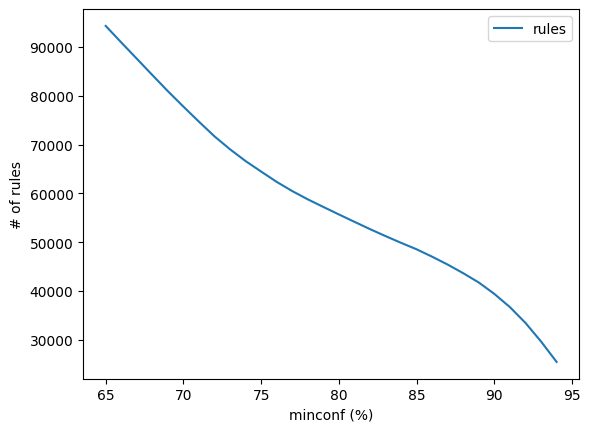

In [176]:
len_rules = []
max_conf = 95
for i in range(65, max_conf):
    rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=i, report="aScl")
    len_rules.append(len(rules))
plt.plot(np.arange(65, max_conf), len_rules, label='rules')
plt.legend()
plt.xlabel("minconf (%)")
plt.ylabel("# of rules")

#plt.yscale('log')
plt.savefig(fname='./img/pm_rules_conf.png', dpi=300, bbox_inches='tight')

plt.show()

4 genre=iranian
12 genre=black-metal
44 genre=sleep
28 genre=study


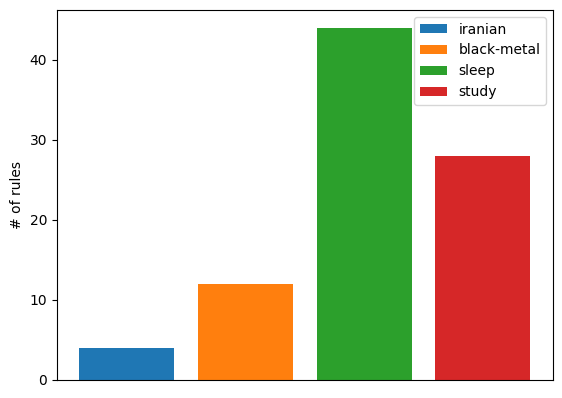

In [329]:
i = 0
for genre in df['genre'].unique():
    count = rules_df[rules_df['consequent'].str.contains(genre)].shape[0]
    if count:
        print(count, genre)
        plt.bar(x=i,height=rules_df[rules_df['consequent'].str.contains(genre)].shape[0], label=genre)
        i+=1
plt.legend(labels=['iranian', 'black-metal', 'sleep', 'study'])
plt.xticks([])
plt.ylabel("# of rules")
plt.savefig(fname='./img/pm_rules_bygenre.png', dpi=300, bbox_inches='tight')
plt.show()

## Classification with association rules

Controllare accuracy di:

- (key=10, popularity=(-0.1, 14.0], time_signature=4.0) -> mode=0.0 | 0.825203 	2.553672
- (key=10, popularity=(-0.1, 14.0]) -> mode=0.0 | 0.790780 	2.447146
- (key=0, liveness=(0.098, 0.13], instrumentalness=(-0.1, 0.003], time_signature=4.0, explicit=False) -> mode=1.0 | 0.929936 	1.373905 
- (key=0, popularity=(42.0, 94.0], speechiness=(-0.1, 0.04]) -> mode=1.0 | 0.916667 	1.354300
- (popularity=(42.0, 94.0], instrumentalness=(0.7, 1.0], valence=(-0.1, 0.2], danceability=(-0.1, 0.4], energy=(-0.1, 0.5]) -> genre=sleep | 0.921052 18.4580922
- (danceability=(0.7, 1.0], instrumentalness=(0.7, 1.0], duration_ms=(8585.9, 180111.8], tempo=(-0.1, 100.0], time_signature=4.0) -> genre=study | 0.91515 18.2907
- (popularity=(14.0, 24.0], energy=(0.9, 1.0], speechiness=(0.09, 0.6], valence=(-0.1, 0.2], danceability=(-0.1, 0.4], explicit=False) -> genre=black-metal | 0.8516 17.066

In [185]:
df_ts = pd.read_csv('./dataset (missing + split)/test_processed.csv', skipinitialspace=True)

#### (key=10, popularity=(-0.1, 14.0], time_signature=4.0) -> mode=0.0

In [248]:
cond = (
    (df_ts['key'] == 10) &
    (df_ts['time_signature'] == 4.0) &
    (df_ts['popularity'] < 14.0)
)

In [249]:
y_true = df_ts[cond]['mode']

In [250]:
y_pred = pd.DataFrame(columns=['mode'])
for n in range(len(y_true)):
    y_pred.loc[n] = 0.0

In [251]:
print(accuracy_score(y_true=y_true, y_pred=y_pred))

0.875


#### (key=10, popularity=(-0.1, 14.0]) -> mode=0.0

In [123]:
cond = (
    (df_ts['popularity'] <= 0.14) & 
    (df_ts['key'] == 10)
)

In [124]:
y_true = df_ts[cond]['mode']

In [125]:
y_pred = pd.DataFrame(columns=['mode'])
for n in range(len(y_true)):
    y_pred.loc[n] = 0.0

In [126]:
print(accuracy_score(y_true=y_true, y_pred=y_pred))

0.8857142857142857


#### (key=0, liveness=(0.098, 0.13], instrumentalness=(-0.1, 0.003], time_signature=4.0, explicit=False) -> mode=1.0

In [127]:
cond = (
    (df_ts['liveness'] <= 0.13) & 
    (df_ts['liveness'] > 0.098) & 
    (df_ts['instrumentalness'] <= 0.003) & 
    (df_ts['key'] == 0) &
    (df_ts['time_signature'] == 4.0) &
    (df_ts['explicit'] == False)
)

In [128]:
y_true = df_ts[cond]['mode']

In [129]:
y_pred = pd.DataFrame(columns=['mode'])
for n in range(len(y_true)):
    y_pred.loc[n] = 1.0

In [130]:
print(accuracy_score(y_true=y_true, y_pred=y_pred))

0.8363636363636363


#### (key=0, popularity=(42.0, 94.0], speechiness=(-0.1, 0.04]) -> mode=1.0

In [139]:
cond = (
    (df_ts['speechiness'] <= 0.04) & 
    (df_ts['popularity'] <= 94.0) &
    (df_ts['popularity'] > 42.0) & 
    (df_ts['key'] == 0)
)

In [140]:
y_true = df_ts[cond]['mode']

In [141]:
y_pred = pd.DataFrame(columns=['mode'])
for n in range(len(y_true)):
    y_pred.loc[n] = 1.0

In [142]:
print(accuracy_score(y_true=y_true, y_pred=y_pred))

0.8305084745762712


#### (popularity=(42.0, 94.0], instrumentalness=(0.7, 1.0], valence=(-0.1, 0.2], danceability=(-0.1, 0.4], energy=(-0.1, 0.5]) -> genre=sleep

In [151]:
cond = (
    (df_ts['danceability'] <= 0.4) & 
    (df_ts['instrumentalness'] > 0.7) &
    (df_ts['popularity'] <= 94.0) &
    (df_ts['popularity'] > 42.0) & 
    (df_ts['valence'] <= 0.2)
)

In [152]:
y_true = df_ts[cond]['genre']

In [153]:
y_pred = pd.DataFrame(columns=['genre'])
for n in range(len(y_true)):
    y_pred.loc[n] = 'sleep'

In [154]:
print(accuracy_score(y_true=y_true, y_pred=y_pred))

0.8709677419354839


#### (danceability=(0.7, 1.0], instrumentalness=(0.7, 1.0], duration_ms=(8585.9, 180111.8], tempo=(-0.1, 100.0], time_signature=4.0) -> genre=study

In [163]:
cond = (
    (df_ts['danceability'] > 0.7) & 
    (df_ts['instrumentalness'] > 0.7) &
    (df_ts['duration_ms'] <= 180111.8) & 
    (df_ts['duration_ms'] > 8585.9) &
    (df_ts['tempo'] <= 100) &
    (df_ts['time_signature'] == 4.0)
)

In [164]:
y_true = df_ts[cond]['genre']

In [165]:
y_pred = pd.DataFrame(columns=['genre'])
for n in range(len(y_true)):
    y_pred.loc[n] = 'study'

In [166]:
print(accuracy_score(y_true=y_true, y_pred=y_pred))

0.7906976744186046


#### (popularity=(14.0, 24.0], energy=(0.9, 1.0], speechiness=(0.09, 0.6], valence=(-0.1, 0.2], danceability=(-0.1, 0.4], explicit=False) -> genre=black-metal 

In [256]:
cond = (
    (df_ts['energy'] > 0.9) &
    (df_ts['speechiness'] > 0.09) &
    (df_ts['speechiness'] <= 0.6) & 
    (df_ts['popularity'] <= 24.0) & 
    (df_ts['popularity'] > 14.0) &
    (df_ts['valence'] <= 0.2) &
    (df_ts['danceability'] <= 0.4) &
    (df_ts['explicit'] <= False)
)

In [257]:
y_true = df_ts[cond]['genre']

In [258]:
y_pred = pd.DataFrame(columns=['genre'])
for n in range(len(y_true)):
    y_pred.loc[n] = 'black-metal'

In [259]:
print(accuracy_score(y_true=y_true, y_pred=y_pred))

0.8378378378378378
